In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a6/08/583e1d8d589e80a702815f58daa317bd469a32c7dc339394e2a0dc14318b/opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.3/38.1 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.6/38.1 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.2/38.1 MB 7.0 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.1 MB 8.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.1 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.1 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.1 MB 11.1 MB/s eta 0:00:04
   ----- ---------

In [1]:
import tensorflow as tf
import cv2
import os

In [2]:
tf.__version__

'2.10.1'

In [3]:
special_attributes = [attr for attr in dir(tf) if attr.startswith("__") and attr.endswith("__")]

print(special_attributes)

['__all__', '__builtins__', '__cached__', '__compiler_version__', '__cxx11_abi_flag__', '__doc__', '__file__', '__git_version__', '__internal__', '__loader__', '__monolithic_build__', '__name__', '__operators__', '__package__', '__path__', '__spec__', '__version__']


In [4]:
data_path = "C:\\Users\\atrij\\OneDrive\\Desktop\\DeepLearning\\Arthritis\\Digital Knee X-ray Images\\Digital Knee X-ray Images\\Knee X-ray Images\\MedicalExpert-I"
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories , labels))
print(label_dict)
print(categories)
print(labels)

{'Doubtful': 0, 'Mild': 1, 'Moderate': 2, 'Normal': 3, 'Severe': 4}
['Doubtful', 'Mild', 'Moderate', 'Normal', 'Severe']
[0, 1, 2, 3, 4]


In [33]:
img_size = 100
data = []
label = []

for category in categories:
    folder_path = os.path.join(data_path , category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path , img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray , (img_size , img_size))
            data.append(resized)
            label.append(label_dict[category])
        except Exception as e:
            print('Exception : ' , e)

In [34]:
import numpy as np

In [35]:
data = np.array(data)/255.0
data = np.reshape(data , (data.shape[0] , img_size , img_size , 1))
label = np.array(label)

In [36]:
from keras.utils import np_utils
new_label = np_utils.to_categorical(label)

In [37]:
new_label.shape

(1650, 5)

In [38]:
data.shape

(1650, 100, 100, 1)

In [39]:
data.shape[1:]  #dimensions of image

(100, 100, 1)

In [40]:
len(data[0][0])

100

In [32]:
data

array([[[[0.03137255],
         [0.03529412],
         [0.03137255],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.03137255],
         [0.03529412],
         [0.03137255],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.03137255],
         [0.03529412],
         [0.03137255],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        ...,

        [[0.00784314],
         [0.01568627],
         [0.03529412],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.01568627],
         [0.03529412],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.01568627],
         [0.03921569],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [31]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [96]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Flatten , Dropout
from keras.layers import Conv2D , MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(128 , (3,3) , padding = 'same' , input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))

model.add(Conv2D(64 , (3,3) , padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))

model.add(Conv2D(32 , (3,3) ,  padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation = 'relu'))

model.add(Dense(5 , activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [41]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Flatten , Dropout
from keras.layers import Conv2D , MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential([

Conv2D(128 , (3,3) , activation = 'relu' ,padding = 'same' , input_shape = (100 , 100 , 1)),
MaxPooling2D(pool_size = (2 , 2)),

Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same'),
MaxPooling2D(pool_size = (2 , 2)),

Conv2D(32 , (3,3) , activation = 'relu', padding = 'same'),
MaxPooling2D(pool_size = (2 , 2)),

Flatten(),
Dropout(0.2),

Dense(128 , activation = 'relu'),
Dropout(0.1),
Dense(64 , activation = 'relu'),

Dense(5 , activation = 'softmax')])

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 128)     1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)      

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data , new_label , test_size = 0.2)

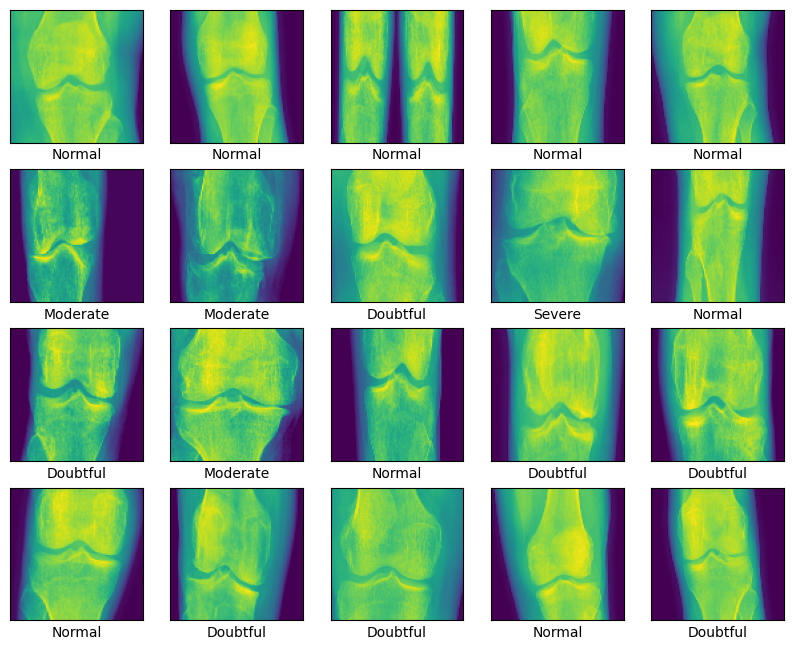

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 10))
for i in range(20):
    plt.subplot(5 , 5 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [16]:
x_train.shape

(1320, 256, 256, 1)

In [46]:
history = model.fit(x_train , y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
33/33 [==============================] - 10s 46ms/step - loss: 1.5409 - accuracy: 0.3002 - val_loss: 1.5501 - val_accuracy: 0.3409
Epoch 2/100
33/33 [==============================] - 1s 36ms/step - loss: 1.5121 - accuracy: 0.3475 - val_loss: 1.5599 - val_accuracy: 0.3030
Epoch 3/100
33/33 [==============================] - 1s 37ms/step - loss: 1.4745 - accuracy: 0.3314 - val_loss: 1.4937 - val_accuracy: 0.3409
Epoch 4/100
33/33 [==============================] - 1s 36ms/step - loss: 1.4332 - accuracy: 0.3693 - val_loss: 1.4840 - val_accuracy: 0.3788
Epoch 5/100
33/33 [==============================] - 1s 36ms/step - loss: 1.4012 - accuracy: 0.3674 - val_loss: 1.4514 - val_accuracy: 0.3902
Epoch 6/100
33/33 [==============================] - 1s 37ms/step - loss: 1.3643 - accuracy: 0.3968 - val_loss: 1.4572 - val_accuracy: 0.4053
Epoch 7/100
33/33 [==============================] - 1s 37ms/step - loss: 1.3214 - accuracy: 0.4309 - val_loss: 1.4130 - val_accuracy: 0.3712
Epoch

33/33 [==============================] - 1s 38ms/step - loss: 0.0624 - accuracy: 0.9792 - val_loss: 3.4565 - val_accuracy: 0.4811
Epoch 59/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0568 - accuracy: 0.9839 - val_loss: 3.1682 - val_accuracy: 0.5000
Epoch 60/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0290 - accuracy: 0.9896 - val_loss: 3.4392 - val_accuracy: 0.4848
Epoch 61/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 3.5812 - val_accuracy: 0.4962
Epoch 62/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0808 - accuracy: 0.9754 - val_loss: 3.0465 - val_accuracy: 0.4962
Epoch 63/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0645 - accuracy: 0.9773 - val_loss: 3.0922 - val_accuracy: 0.5000
Epoch 64/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0420 - accuracy: 0.9886 - val_loss: 3.5764 - val_accuracy: 0.5114
Epoch 65/100

In [47]:
model.save(model.h5)

AttributeError: 'Sequential' object has no attribute 'h5'

In [48]:
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arrange(0 , N) , history.history["loss"] , label = "train_loss")
plt.plot(np.arrange(0 , N) , history.history["val_loss"] , label = "val_loss")
plt.plot(np.arrange(0 , N) , history.history["accuracy"] , label = "train_acc")
plt.plot(np.arrange(0 , N) , history.history["val_accuracy"] , label = "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch#")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "center right")
plt.savefig("CNN_Model")

AttributeError: module 'numpy' has no attribute 'arrange'

<Figure size 640x480 with 0 Axes>

In [49]:
val_loss , val_accuracy = model.evaluate(x_test , y_test , verbose = 0)
print("test loss : " , val_loss , "%")
print("test accuracy : ", val_acuracy , "%")

test loss :  3.326043128967285 %


NameError: name 'val_acuracy' is not defined

1/1 [==============================] - 0s 328ms/step
A.I predicts :  Normal
Correct prediction for label  3 is Normal


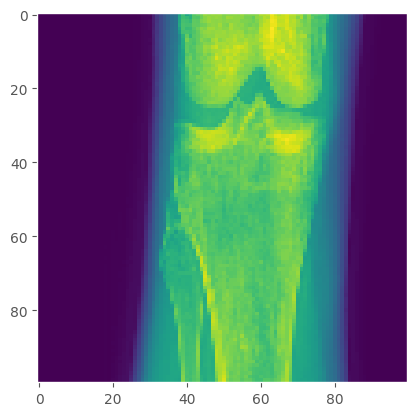

In [51]:
X = 32

img_size = 100

img_single = x_test[X]
img_single = cv2.resize(img_single , (img_size , img_size))
img_single = (np.expand_dims(img_single , 0))
img_single = img_single.reshape(img_single.shape[0],100,100,1)

predictions_single = model.predict(img_single)
print("A.I predicts : " , categories[np.argmax(predictions_single)])
print("Correct prediction for label " , np.argmax(y_test[X]) , 'is' , categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()